In [33]:
import pandas as pd

In [34]:
data_juni23 = pd.read_csv('../data/juni 2023.csv')
data_juli23 = pd.read_csv('../data/juli 2023.csv')
data_agustus23 = pd.read_csv('../data/agustus 2023.csv')
data_september23 = pd.read_csv('../data/september 2023.csv')
data_oktober23 = pd.read_csv('../data/oktober 2023.csv')
data_november23 = pd.read_csv('../data/november 2023.csv')
data_desember23 = pd.read_csv('../data/desember 2023.csv')
data_januari24 = pd.read_csv('../data/januari 2024.csv')
data_februari24 = pd.read_csv('../data/februari 2024.csv')
data_maret24 = pd.read_csv('../data/maret 2024.csv')
data_april24 = pd.read_csv('../data/april 2024.csv')
data_mei24 = pd.read_csv('../data/mei 2024.csv')
data_juni24 = pd.read_csv('../data/juni 2024.csv')

In [35]:
juni23 = data_juni23.iloc[8:38]
juli23 = data_juli23.iloc[8:39]
agustus23 = data_agustus23.iloc[8:39]
september23 = data_september23.iloc[8:38]
oktober23 = data_oktober23.iloc[8:39]
november23 = data_november23.iloc[8:38]
desember23 = data_desember23.iloc[8:39]
januari24 = data_januari24.iloc[8:39]
februari24 = data_februari24.iloc[8:37]
maret24 = data_maret24.iloc[8:39]
april24 = data_april24.iloc[8:38]
mei24 = data_mei24.iloc[8:38]
juni24 = data_juni24.iloc[8:38]

In [36]:
df = pd.concat([juni23, juli23, agustus23, september23, oktober23, november23, desember23, januari24, februari24, maret24, april24, mei24, juni24])
df.columns = ['tanggal', 'suhu min', 'suhu maks', 'suhu rata', 'lama penyinaran matahari']

In [37]:
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d-%m-%Y')
df[['suhu min', 'suhu maks', 'suhu rata', 'lama penyinaran matahari']] = df[
    ['suhu min', 'suhu maks', 'suhu rata', 'lama penyinaran matahari']
    ].astype(float)

In [38]:
df

,tanggal,suhu min,suhu maks,suhu rata,lama penyinaran matahari
8,2023-06-02,26.0,34.4,29.9,6.5
9,2023-06-03,27.0,33.8,30.2,5.7
10,2023-06-04,27.8,32.8,29.5,6.2
11,2023-06-05,27.2,33.6,29.6,4.0
12,2023-06-06,26.0,31.6,27.8,4.4
...,...,...,...,...,...
33,2024-06-27,26.0,33.2,29.7,7.0
34,2024-06-28,27.4,33.4,29.6,5.5
35,2024-06-29,27.4,33.2,27.3,6.5
36,2024-06-30,25.4,33.0,29.4,0.6


In [39]:
df = df.drop(columns=['lama penyinaran matahari'])
df.isnull().sum()

tanggal       0
suhu min     24
suhu maks     3
suhu rata     1
dtype: int64

In [40]:
df

,tanggal,suhu min,suhu maks,suhu rata
8,2023-06-02,26.0,34.4,29.9
9,2023-06-03,27.0,33.8,30.2
10,2023-06-04,27.8,32.8,29.5
11,2023-06-05,27.2,33.6,29.6
12,2023-06-06,26.0,31.6,27.8
...,...,...,...,...
33,2024-06-27,26.0,33.2,29.7
34,2024-06-28,27.4,33.4,29.6
35,2024-06-29,27.4,33.2,27.3
36,2024-06-30,25.4,33.0,29.4


In [41]:
# df.set_index('tanggal', inplace=True)
# df

In [42]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['suhu rata'], order=(5, 0, 0))
model_fit = model.fit()

/home/user/machine-learning/virtual-environment/venv9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/user/machine-learning/virtual-environment/venv9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/user/machine-learning/virtual-environment/venv9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


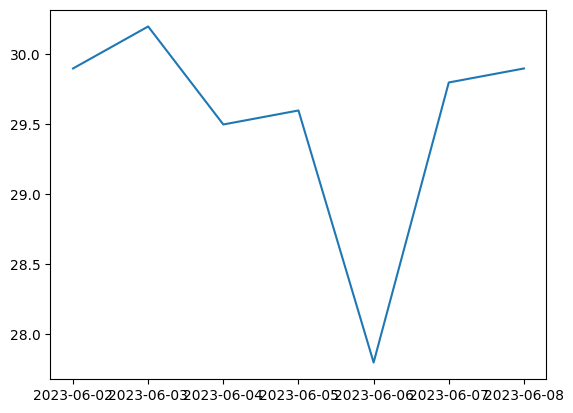

In [54]:
x = df.iloc[:7]
plt.plot(x['tanggal'], x['suhu rata'])
plt.show()

/home/user/machine-learning/virtual-environment/venv9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/user/machine-learning/virtual-environment/venv9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

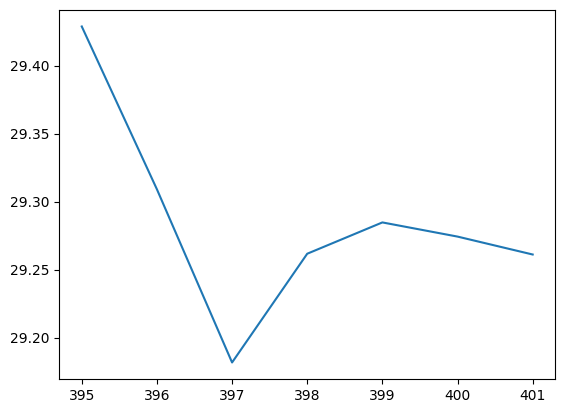

In [43]:
forecast = model_fit.forecast(steps=7)
forecast.plot()

In [45]:
# import joblib

# joblib.dump(model_fit, 'model_prediction.joblib')

In [46]:
# import joblib

# load_model = joblib.load('model_prediction.joblib')
# x = load_model.forecast(steps=10)
# x